<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 2. Визуальный анализ данных
## <center>Практическое задание. Визуальный анализ данных по пассажирам "Титаника". Решение

**<a href="https://www.kaggle.com/c/titanic">Соревнование</a> Kaggle "Titanic: Machine Learning from Disaster".**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

**Считываем обучающую выборку.**

In [5]:
train_df = pd.read_csv("../../data/titanic_train.csv", 
                       index_col='PassengerId') 

In [6]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [7]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


**Выкинем признак `Cabin`, а потом – все строки, где есть пропуски.**

In [9]:
train_df = train_df.drop('Cabin', axis=1).dropna()

**Постройте попарные зависимости признаков `Age`, `Fare`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked` и `Survived`. (метод `scatter_matrix ` Pandas или `pairplot` Seaborn).**

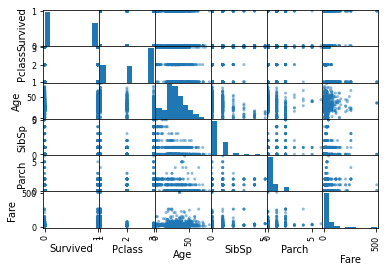

In [12]:
pd.plotting.scatter_matrix(train_df);

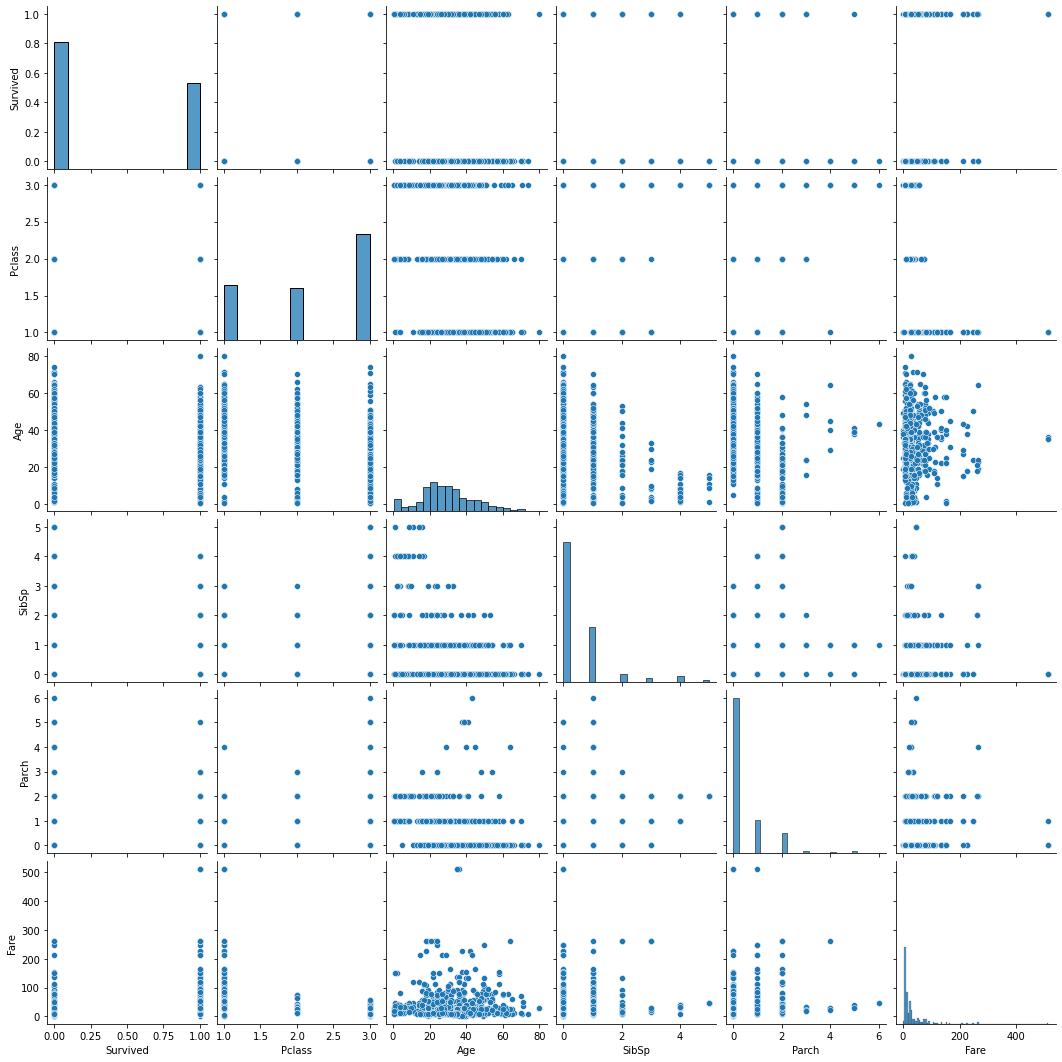

In [23]:
sns.pairplot(train_df.drop(['Ticket', 'Name'], axis = 1));

**Как плата за билет (`Fare`) зависит от класса каюты (`Pclass`)? Постройте boxplot.**

In [43]:
for i in range(3):
    print(train_df[train_df['Pclass'] == i+1]['Fare'].median())

67.94999999999999
15.0458
8.05


In [44]:
for i in range(3):
    print(train_df[train_df['Pclass'] == i+1]['Fare'].std())

81.2935241095883
13.187429246949213
10.043158373731758


In [71]:
# train_df['Fare_no_out_1'] = train_df[abs(train_df[train_df['Pclass'] == 1]['Fare'] - \
# train_df[train_df['Pclass'] == 1]['Fare'].median()) \
# < 2*train_df[train_df['Pclass'] == 1]['Fare'].std()]

In [110]:
for i in range(3):
    train_df['Fare' + str(i+1)] = train_df[train_df['Pclass'] == (i+1)]['Fare']
    train_df['Fare' + str(i+1)] = train_df[abs(train_df['Fare' + str(i+1)].median() - train_df['Fare' + str(i+1)]) < 2*train_df['Fare' + str(i+1)].std()]['Fare']

# print(train_df['Fare3'].max())
# print(train_df[train_df['Pclass'] == 3]['Fare'].max())
train_df['Fare_no_out'] = train_df['Fare1'].fillna(0) + train_df['Fare2'].fillna(0) + train_df['Fare3'].fillna(0)
train_df.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare1,Fare2,Fare3,Fare_no_out
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,NaN,NaN,7.250,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,71.2833,NaN,NaN,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,NaN,7.925,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,53.1000,NaN,NaN,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,NaN,NaN,8.050,8.0500


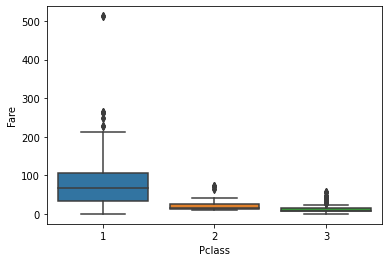

In [105]:
sns.boxplot(x='Pclass', y='Fare', data = train_df);

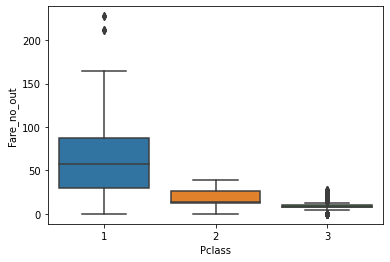

In [112]:
sns.boxplot(x='Pclass', y='Fare_no_out', data = train_df);

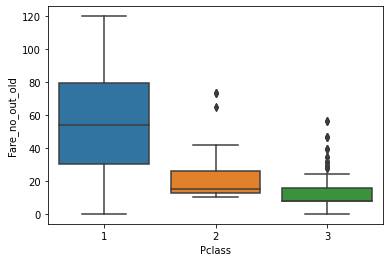

In [113]:
train_df['Fare_no_out_old'] = train_df[abs(train_df['Fare'].median() - train_df['Fare']) < 2*train_df['Fare'].std()]['Fare']
sns.boxplot(x='Pclass', y='Fare_no_out_old', data = train_df);

**Такой boxplot получается не очень красивым из-за выбросов.** 

**Опционально: создайте признак `Fare_no_out` (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.**

In [ ]:
train_df['Fare_no_out'] = train_df['Fare']
fare_pclass1 = train_df[train_df['Pclass'] == 1]['Fare']
fare_pclass2 = train_df[train_df['Pclass'] == 2]['Fare']
fare_pclass3 = train_df[train_df['Pclass'] == 3]['Fare']
fare_pclass1_no_out = # Ваш код здесь
fare_pclass2_no_out = # Ваш код здесь
fare_pclass3_no_out = # Ваш код здесь
train_df['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                             .append(fare_pclass3_no_out)

**Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

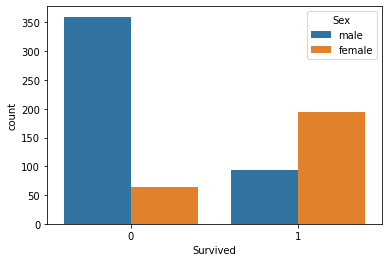

In [115]:
sns.countplot(x='Survived',hue='Sex', data = train_df)

**Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue.**

<AxesSubplot:xlabel='Survived', ylabel='count'>

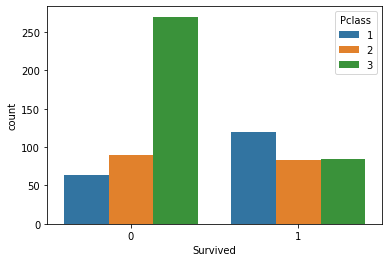

In [116]:
sns.countplot(x='Survived',hue='Pclass', data = train_df)

**Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.**

In [145]:
train_df['Age_category'] = train_df['Age'].apply(lambda age: 'young' if age < 30 else ('old' if age >60 else np.nan))
train_df['Age_category'].value_counts()

young    384
old       21
Name: Age_category, dtype: int64

In [156]:
# sns.countplot(x = 'Survived', hue = 'Age_category', data = train_df)
train_df[(train_df['Survived'] == 1) & (train_df['Age_category'] == 'old')]['Survived'].count() / \
train_df[~(train_df['Survived'] == 1) & (train_df['Age_category'] == 'old')]['Survived'].count()

0.23529411764705882

In [157]:
# sns.countplot(x = 'Survived', hue = 'Age_category', data = train_df)
train_df[(train_df['Survived'] == 1) & (train_df['Age_category'] == 'young')]['Survived'].count() / \
train_df[~(train_df['Survived'] == 1) & (train_df['Age_category'] == 'young')]['Survived'].count()

0.6842105263157895